In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import ast
import math

In [369]:
# ! pip freeze > requirements.txt

In [370]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [371]:
# web app
# form to input and come up with output 
# save model as asset in proj folder and load

In [372]:
# forecasting
# stage of start up in next funding round will company even have funding round? - yes or no 
# linear regression amt of funding predited to get company into next round e.g. preseed etc

In [373]:
# NEWW
# modularise codes into py files

# EDA + Data Wrangling

In [374]:
# df = pd.read_csv('combined (0-30k).csv')

In [375]:
df = pd.read_csv('full information (0-60k).csv')

In [376]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [377]:
df

,name,profile_type,about,location,employee,hiring_status,investor,investor_type,website,industries,...,money_raised_at_ipo,last_funding,ipo_share_price,downloads_last_30_days,acquired_by,announced_date,price,diversity_spotlight_(us_only),sub-organization_of,delisted_date
0,softbank,INVESTMENT FIRM,"['SoftBank provides fixed-line, mobile telepho...","Tokyo, Tokyo, Japan",10001+,NaN,Investment Bank,['Investment Bank'],global.softbank,"['Banking', 'Internet', 'Mobile', 'Telecommuni...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,apollo-global-management-llc,INVESTMENT FIRM,['Apollo Global Management is an asset managem...,"New York, New York, United States",1001-5000,NaN,Private Equity Firm,['Private Equity Firm'],www.apollo.com,"['Asset Management', 'Credit', 'Finance', 'Fin...",...,$565.4M,NaN,$19.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,square,ORGANIZATION,['Square is a merchant services aggregator and...,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,NaN,squareup.com,"['FinTech', 'Hardware', 'Mobile Payments', 'Pa...",...,$243M,Post-IPO Equity,$9.00,"373,621",NaN,NaN,NaN,NaN,NaN,NaN
3,ant-group,ORGANIZATION,['Ant Group strives to enable all consumers an...,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,NaN,www.antgroup.com/,"['Banking', 'Financial Services', 'FinTech', '...",...,NaN,Series C,NaN,NaN,NaN,NaN,NaN,NaN,['Alibaba Group'],NaN
4,citigroup,INVESTMENT FIRM,['Citigroup is a diversified financial service...,"New York, New York, United States",10001+,NaN,Investment Bank,['Investment Bank'],www.citigroup.com,"['Banking', 'Credit Cards', 'Financial Service...",...,NaN,NaN,NaN,"1,796",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59876,maternity-neighborhood,ORGANIZATION,['Maternity Neighborhood is a mission-driven c...,"Charlottesville, Virginia, United States",Nov-50,NaN,NaN,NaN,maternityneighborhood.com/,"['Delivery', 'Electronic Health Record (EHR)',...",...,NaN,Venture - Series Unknown,NaN,NaN,NaN,NaN,NaN,"['Women Founded', 'Women Led']",NaN,NaN
59877,om-spirits,ORGANIZATION,['OM spirits produces a line of award winning ...,"Los Angeles, California, United States",1-Oct,NaN,NaN,NaN,organicmixology.com,"['Consumer Goods', 'Food and Beverage', 'Wine ...",...,NaN,Series A,NaN,NaN,NaN,NaN,NaN,['Women Founded'],NaN,NaN
59878,prosper-5cdb,ORGANIZATION,['Prosper is the career coach in your pocket. ...,"Toronto, Ontario, Canada",1-Oct,NaN,NaN,NaN,helloprosper.com/,"['Consumer Applications', 'Education', 'Human ...",...,NaN,Pre-Seed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59879,oxford-biochronometrics,ORGANIZATION,['Armed w/Ox Bio Human Recognition Technology ...,"London, England, United Kingdom",Nov-50,NaN,NaN,NaN,www.oxford-biochron.com,"['Analytics', 'Big Data', 'Biometrics', 'Cyber...",...,NaN,Venture - Series Unknown,NaN,NaN,['Rose Hill Acquisition Company LTD'],"['Jan 1, 2018']",NaN,NaN,NaN,NaN


In [378]:
df = df[df['profile_type']=="ORGANIZATION"]

In [379]:
df['ipo_status'].value_counts()

Private     53881
Public       4359
Delisted      491
Name: ipo_status, dtype: int64

In [380]:
df['profile_type'].value_counts()

ORGANIZATION    58731
Name: profile_type, dtype: int64

In [381]:
df.columns

Index(['name', 'profile_type', 'about', 'location', 'employee',
       'hiring_status', 'investor', 'investor_type', 'website', 'industries',
       'founded_date', 'closed_date', 'founders', 'operating_status',
       'last_funding_type', 'stock_symbol', 'headquarters_regions',
       'related_hubs', 'company_type', 'ipo_status', 'hub_tags',
       'product_downloads', 'investment_stage', 'number_of_funding_rounds',
       'number_of_lead_investors', 'number_of_investors', 'funds_raised',
       'number_of_funds', 'total_funding_amount', 'ipo_date',
       'total_fund_raised', 'number_of_investments',
       'number_of_lead_investments', 'number_of_diversity_investments',
       'number_of_acquisitions', 'number_of_exits',
       'number_of_board_member_and_advisor_profiles',
       'number_of_employee_profiles', 'total_products_active',
       'monthly_visits', 'monthly_visits_growth', 'active_tech_count',
       'number_of_articles', 'number_of_events', 'valuation_at_ipo',
       'm

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58731 entries, 2 to 59880
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   name                                         58730 non-null  object 
 1   profile_type                                 58731 non-null  object 
 2   about                                        58731 non-null  object 
 3   location                                     58621 non-null  object 
 4   employee                                     58302 non-null  object 
 5   hiring_status                                4789 non-null   object 
 6   investor                                     0 non-null      object 
 7   investor_type                                389 non-null    object 
 8   website                                      58435 non-null  object 
 9   industries                                   58160 non-null  object 
 10

In [383]:
def nan_eda(df):
    total_null = df.isna().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_null, percent], axis=1, keys=['Total NaNs', 'Percent of NaNs'])
    return missing_data

In [384]:
nan_eda(df)

,Total NaNs,Percent of NaNs
investor,58731,1.000000
funds_raised,58731,1.000000
product_downloads,58731,1.000000
delisted_date,58670,0.998961
investment_stage,58523,0.996458
total_fund_raised,58501,0.996084
number_of_funds,58467,0.995505
investor_type,58342,0.993377
related_hubs,58225,0.991384
number_of_diversity_investments,58104,0.989324


In [385]:
# dropping not useful cols using contextual info - dont drop here drop at feat selec step
df.drop(['name', 'profile_type', 'website', 'about', 'investor', 'funds_raised', 'product_downloads', 
         'founded_date', 'closed_date', 'founders', 'delisted_date', 'last_funding',
         'stock_symbol', 'headquarters_regions', 'ipo_date', 'sub-organization_of',
         'acquired_by', 'announced_date', 'number_of_exits'], axis=1, inplace=True)

In [386]:
# drop those with high percentage of NaNs
nan_eda(df)

,Total NaNs,Percent of NaNs
investment_stage,58523,0.996458
total_fund_raised,58501,0.996084
number_of_funds,58467,0.995505
investor_type,58342,0.993377
related_hubs,58225,0.991384
number_of_diversity_investments,58104,0.989324
valuation_at_ipo,57513,0.979261
hub_tags,57164,0.973319
number_of_lead_investments,57138,0.972876
ipo_share_price,57114,0.972468


In [387]:
df.dropna(how="all", inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1, inplace=True)
df = df[df['last_funding_type'].notna()]
df.reset_index(inplace=True)
df.drop(['index'],axis=1, inplace=True)

## Formatting columns

In [388]:
# # indexes with col names as values
# pos = [4999, 9365, 19071]
# df.drop(df.index[pos], inplace=True)
# df.reset_index(inplace=True)
# df.drop(['index'],axis=1, inplace=True)

In [389]:
def unlist_cat_cols_kmeans(df, listed_cat_cols_kmeans):    
    for i in listed_cat_cols_kmeans:
        df[i] = df[i].apply(lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else np.nan)

In [390]:
unlist_cat_cols_kmeans(df, ['industries', 'related_hubs', 'hub_tags', 'diversity_spotlight_(us_only)', 'price',
                            'investment_stage'])

In [391]:
def unlist_last_funding_type(df):
    for i in range(len(df)):
        try:
            df['last_funding_type'][i] = "".join(ast.literal_eval(df['last_funding_type'][i]))
        except:
            continue

In [392]:
unlist_last_funding_type(df)

In [395]:
def unlist_op_stat(op_stat):
    tags = {'Active':["['Active']", "'Active']"], 
            'Closed': ["['Closed']"]}
    if op_stat is not np.nan:
        for k, v in tags.items():
            if op_stat in v:
                return k
        return k
    else:
        return np.nan
        
df['operating_status'] = df['operating_status'].apply(lambda x: unlist_op_stat(x))

In [396]:
def unlist_company_type(df, company_type):
    for j in range(len(df)):
        if df[company_type][j] is not np.nan:
            if df[company_type][j] == "['For Profit']":
                df[company_type][j] = 'For Profit'
            elif df[company_type][j] == "['Non-profit']":
                df[company_type][j] = 'Non Profit'
            elif df[company_type][j] == "'For Profit']":
                df[company_type][j] = 'For Profit'  

In [397]:
unlist_company_type(df, 'company_type')

In [398]:
# TBC
currencies = {'£':1.42, '€':1.22, '₹':0.014, 'CN¥':0.16, 'ZAR':0.071, 'CA$':0.83, 'BDT':0.012, 
              'SEK':0.12, 'CHF':1.11, 'A$':0.77, '¥':0.0091, 'DKK':0.16, '₩':0.00090, 'R$':0.20,
             'AED':0.27, 'HK$':0.13, '₪':0.31, 'SGD':0.75, 'PLN':0.27, 'RUB':0.014, 'NGN':0.0024, 
              'THB':0.032, 'NOK':0.12, 'NT$':0.03616,
             'QAR':0.27, 'MX$': 0.050, 'NZ$':0.71, 'IDR':0.000070, 'KES':0.0093, 'MYR':0.24, 
              'PHP':0.021, '₫':0.00004, 'ISK':0.0082, 'KWD':3.33,
             'TRY':0.12, 'SAR':0.27, 'HRK':0.16, 'SDG':0.0022, 'MAD':0.11, 'COP':0.00027, 'CLP':0.0014, 
              'EGP':0.064, 'CZK':0.046, 'HUF':0.0034, 'DZD':0.0074, 
             'SKK':0.0393914, 'MMK':0.00061, 'IRR':0.000024, 'PKR':0.0064, 
              'TND':0.36, 'UGX':0.00028}

def currency_to_usd(df, list_of_other_currency_cols):
    for i in list_of_other_currency_cols:
        for j in range(len(df)):
            if df[i][j] is not np.nan:
                if isinstance(df[i][j], str):
                    if ',' in df[i][j]:
                        df[i][j] = df[i][j].replace(',','')

                    if "[" in df[i][j]:
                        df[i][j] = "".join(ast.literal_eval(df[i][j]))

                    if df[i][j][0] == '$': 
                        df[i][j] = df[i][j][1:]

                    elif df[i][j][1].isdigit():
                        value = str(float(df[i][j][1:-1])*currencies.get(df[i][j][0]))
                        df[i][j] = value+df[i][j][-1]

                    elif df[i][j][2].isdigit():
                        value = str(float(df[i][j][2:-1])*currencies.get(df[i][j][0:2]))
                        df[i][j] = value+df[i][j][-1]

                    elif df[i][j][3].isdigit():
                        value = str(float(df[i][j][3:-1])*currencies.get(df[i][j][0:3]))
                        df[i][j] = value+df[i][j][-1]

                    elif df[i][j][0:3] == "['$":  
                        df[i][j] =  df[i][j][3:]
                    elif df[i][j][0:3] == "['£":
                        df[i][j] =  float(df[i][j][3:])*1.42
                    elif df[i][j][0:3] == "['€":
                        df[i][j] =  float(df[i][j][3:])*1.22
                    elif df[i][j][0:3] == "['₹":
                        df[i][j] =  float(df[i][j][3:])*0.014
                    elif df[i][j][0:3] == "['¥":
                        df[i][j] =  float(df[i][j][3:])*0.0091
                    elif df[i][j][0:3] == "['₫":
                        df[i][j] =  float(df[i][j][3:])*0.00004   
                else:
                    df[i][j] =  float(df[i][j])

In [399]:
#TBC
currency_to_usd(df, ['total_funding_amount', 'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo', 'price'])

In [400]:
# # code to check diff types of currencies in data, DO NOT run this cell after running prev cell will get error
# currencies = {'£':1.42, '€':1.22, '₹':0.014, 'CN¥':0.16, 'ZAR':0.071, 'CA$':0.83, 'BDT':0.012, 
#               'SEK':0.12, 'CHF':1.11, 'A$':0.77, '¥':0.0091, 'DKK':0.16, '₩':0.00090, 'R$':0.20,
#              'AED':0.27, 'HK$':0.13, '₪':0.31, 'SGD':0.75, 'PLN':0.27, 'RUB':0.014, 'NGN':0.0024, 
#               'THB':0.032, 'NOK':0.12, 'NT$':0.03616,
#              'QAR':0.27, 'MX$': 0.050, 'NZ$':0.71, 'IDR':0.000070, 'KES':0.0093, 'MYR':0.24, 
#               'PHP':0.021, '₫':0.00004, 'ISK':0.0082, 'KWD':3.33,
#              'TRY':0.12, 'SAR':0.27, 'HRK':0.16, 'SDG':0.0022, 'MAD':0.11, 'COP':0.00027, 'CLP':0.0014, 
#               'EGP':0.064, 'CZK':0.046,
#              'HUF':0.0034, 'DZD':0.0074, 'SKK':0.0393914, 'MMK':0.00061, 'IRR':0.000024, 'PKR':0.0064, 
#               'TND':0.36, 'UGX':0.00028}

# list_of_other_currency_cols=['total_funding_amount', 'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo', 
#                      'price', 'ipo_share_price']
# others = ['$']
# for i in list_of_other_currency_cols:
#     for j in range(len(df)):
#         if df[i][j] is not np.nan:
#             if isinstance(df[i][j], str):
#                 if df[i][j][1].isdigit():
#                     if df[i][j][0] not in currencies.keys():
#                         if df[i][j][0] not in others:
#                             others.append(df[i][j][0])

#                 elif df[i][j][2].isdigit():            
#                     if df[i][j][0:2] not in currencies.keys():
#                         if df[i][j][0:2] not in others:
#                             others.append(df[i][j][0:2])

#                 elif df[i][j][3].isdigit():            
#                     if df[i][j][0:3] not in currencies.keys():
#                         if df[i][j][0:3] not in others:
#                             others.append(df[i][j][0:3])
#                 elif df[i][j][0:3] == "['$":  
#                     continue

#                 elif df[i][j][0:3] == "['£":
#                     continue

#                 else:

#                     continue

In [401]:
# others

In [402]:
# assuming all values are in billion, million or NAN
def remove_TBMK(df, list_of_TBMK_cols):
    for i in list_of_TBMK_cols:
        for j in range(len(df)):
            if df[i][j] is not np.nan:
                if isinstance(df[i][j], str):
                    if df[i][j][-1] == 'B':
                        df[i][j] = float(df[i][j][:-1])*1000000000
                    elif df[i][j][-1] == 'M':
                        df[i][j] = float(df[i][j][:-1])*1000000
                    elif df[i][j][-1] == 'K':
                        df[i][j] = float(df[i][j][:-1])*100000
                    elif df[i][j][-1]=='T':
                        df[i][j] = float(df[i][j][:-1])*1000000000000
                else:
                    df[i][j] = float(df[i][j])

In [403]:
remove_TBMK(df, ['total_funding_amount', 'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo',
                 'price'])

In [404]:
def remove_commas_numeric(df, list_of_numeric_cols_w_comma):
    for i in list_of_numeric_cols_w_comma:
        df[i] = df[i].apply(lambda x: float(x.replace(',','')) if x is not np.nan else np.nan)

In [405]:
remove_commas_numeric(df, ['monthly_visits', 'number_of_articles', 'downloads_last_30_days'])

In [406]:
def unstring_numeric(df, list_of_string_numeric_cols):
    for i in list_of_string_numeric_cols:
        df[i] = df[i].apply(lambda x: float(str(x).replace(',','')) if x is not np.nan else np.nan)

In [407]:
# number_of_investments
unstring_numeric(df, ['number_of_funding_rounds', 'number_of_lead_investors', 'number_of_investors',
                     'number_of_funds', 'number_of_investments', 'number_of_lead_investments', 
                     'number_of_diversity_investments', 'number_of_acquisitions', 
                      'number_of_board_member_and_advisor_profiles', 'number_of_employee_profiles',
                     'total_products_active', 'active_tech_count', 'number_of_events'])

In [408]:
# def unstring_unlist_numeric(df, list_of_string_numeric_cols):
#     for i in list_of_string_numeric_cols:
#         for j in range(len(df)):
#             if df[i][j] is not np.nan:
#                 if "[" in df[i][j]:
#                     df[i][j] = float("".join(ast.literal_eval(df[i][j])))
#                 else:
#                     df[i][j] = float(df[i][j])

In [409]:
# unstring_unlist_numeric(df, ['number_of_exits'])

In [410]:
df['monthly_visits_growth'] = df['monthly_visits_growth'].apply(lambda x: float(x.replace(',', '').replace('%', ''))*100 if x is not np.nan else np.nan)

In [411]:
df.head()

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,monthly_visits_growth,active_tech_count,number_of_articles,number_of_events,valuation_at_ipo,money_raised_at_ipo,ipo_share_price,downloads_last_30_days,price,diversity_spotlight_(us_only)
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,154.0,30.0,7867.0,22.0,2900000000.0,243000000.0,$9.00,373621.0,NaN,NaN
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,1369.0,13.0,2457.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,-5.0,61.0,2751.0,97.0,2000000000.0,150000000.0,$23.99,NaN,NaN,NaN
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,104.0,90.0,3326.0,42.0,9200000000.0,751000000.0,$36.00,29619410.0,NaN,NaN
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,-199.0,128.0,13619.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
# dropping not useful cols using contextual info - dont drop here drop at feat selec step
df.drop(['ipo_share_price'], axis=1, inplace=True)

## Feature Engineering

In [413]:
# Unicorn + Pledge 1% Unicorn [value >= $1B]
# Exited Unicorn + Exited Unicorn, Pledge 1% + Crunchbase Venture Program, Exited Unicorn [value >= $1B, public or acq]
# Emerging Unicorn + Emerging Unicorn, Pledge 1% [$1B >= value >= $500M]

# others: Crunchbase Venture Program + Crunchbase Venture Program, Pledge 1% + Pledge 1%

In [414]:
def hub_tag_cat(hub_tag):
    tags = {'Unicorn':['Unicorn', 'Pledge 1%, Unicorn'], 
            'Exited Unicorn': ['Exited Unicorn', 'Exited Unicorn, Pledge 1%', 'Crunchbase Venture Program, Exited Unicorn'], 
            'Emerging Unicorn': ['Emerging Unicorn', 'Emerging Unicorn, Pledge 1%'], 
            'Others': ['Crunchbase Venture Program', 'Crunchbase Venture Program, Pledge 1%', 'Pledge 1%']}
    
    if hub_tag is not np.nan:
        for k, v in tags.items():
            if hub_tag in v:
                return k
        return k
    else:
        return np.nan

In [415]:
df['hub_tags_cat'] = df['hub_tags'].apply(lambda x: hub_tag_cat(x))

In [416]:
df['location_country'] = df['location'].apply(lambda x: str(x).split(",")[-1].lstrip())

In [417]:
df['location_city'] = df['location'].apply(lambda x: str(x).split(",")[0].lstrip())

In [418]:
df['location_city'].unique()

array(['San Francisco', 'Hangzhou', 'San Jose', ..., 'Ballincollig',
       'Chessington', 'Lynchburg'], dtype=object)

In [419]:
# https://thenextweb.com/news/top-7-startup-cities-keep-their-ranking-in-2020-but-new-players-are-on-the-rise
def location_city_in_startup_cluster(df):
    # top 20 most prominent startup locations
    top_20_startup_locations = ['Silicon Valley', 'New York', 'London', 'Beijing', 'Boston',
                        'Tel Aviv', 'Los Angeles', 'Shanghai', 'Seattle', 'Stockholm',
                        'Washington DC', 'Amsterdam', 'Paris', 'Chicago', 'Tokyo',
                        'Berlin', 'Singapore', 'Toronto-Waterloo', 'Austin', 'Seoul']
    
    df['in_startup_cluster'] = df['location_city'].apply(lambda x: 1 if x in top_20_startup_locations else 0) 

In [420]:
location_city_in_startup_cluster(df)

In [421]:
df


,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,number_of_events,valuation_at_ipo,money_raised_at_ipo,downloads_last_30_days,price,diversity_spotlight_(us_only),hub_tags_cat,location_country,location_city,in_startup_cluster
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,22.0,2900000000.0,243000000.0,373621.0,NaN,NaN,Exited Unicorn,United States,San Francisco,0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,8.0,NaN,NaN,NaN,NaN,NaN,Unicorn,China,Hangzhou,0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,97.0,2000000000.0,150000000.0,NaN,NaN,NaN,Exited Unicorn,United States,San Francisco,0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,42.0,9200000000.0,751000000.0,29619410.0,NaN,NaN,Exited Unicorn,United States,San Jose,0
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,132.0,NaN,NaN,NaN,NaN,NaN,NaN,United States,Santa Clara,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57694,"Charlottesville, Virginia, United States",Nov-50,NaN,NaN,Delivery Electronic Health Record (EHR) Electr...,Active,Venture - Series Unknown,NaN,For Profit,Private,...,NaN,NaN,NaN,NaN,NaN,Women Founded Women Led,NaN,United States,Charlottesville,0
57695,"Los Angeles, California, United States",1-Oct,NaN,NaN,Consumer Goods Food and Beverage Wine And Spirits,Active,Series A,NaN,For Profit,Private,...,NaN,NaN,NaN,NaN,NaN,Women Founded,NaN,United States,Los Angeles,1
57696,"Toronto, Ontario, Canada",1-Oct,NaN,NaN,Consumer Applications Education Human Resource...,Active,Pre-Seed,NaN,For Profit,Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Toronto,0
57697,"London, England, United Kingdom",Nov-50,NaN,NaN,Analytics Big Data Biometrics Cyber Security F...,Active,Venture - Series Unknown,NaN,For Profit,Private,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom,London,1


In [422]:
ind = df[['industries']]
ind.dropna(inplace=True)

In [423]:
ind

,industries
0,FinTech Hardware Mobile Payments Payments
1,Banking Financial Services FinTech Payments
2,Enterprise Software Messaging Mobile Apps SMS ...
3,Collaboration Information Technology Messaging...
4,Artificial Intelligence GPU Hardware Software ...
...,...
57694,Delivery Electronic Health Record (EHR) Electr...
57695,Consumer Goods Food and Beverage Wine And Spirits
57696,Consumer Applications Education Human Resource...
57697,Analytics Big Data Biometrics Cyber Security F...


In [424]:
hubs = df[['related_hubs']]
hubs.dropna(inplace=True)

In [425]:
hubs

,related_hubs
0,Square Alumni Founded Companies
1,Ant Group Portfolio Companies
2,Twilio Alumni Founded Companies
4,"NVIDIA Alumni Founded Companies, Nvidia Portfo..."
6,OurCrowd Portfolio Companies
...,...
52161,HomeAway Alumni Founded Companies
53362,ProSiebenSat.1 Media SE Alumni Founded Companies
53443,Ariba Alumni Founded Companies
54367,LexisNexis Alumni Founded Companies


In [426]:
class Kmeans: # run after removing NANs from industry col
    """ 
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        self.centroids = None
        self.cluster_labels = None
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        Returns
        -------
        instance of kmeans class
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for i in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if i % 100 == 0:
                print("Running Model Iteration %d " %i)
        print("Model finished running")
        return self

In [427]:
from sklearn.feature_extraction.text import TfidfVectorizer
#create tfidf array based on unique industries
def create_tfidf_array(data):
    
    tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                                 max_features = 20000)
    tf_idf = tf_idf_vectorizor.fit_transform(data)
    tf_idf_norm = normalize(tf_idf)
    tf_idf_array = tf_idf_norm.toarray()
    
    return tf_idf_array

In [428]:
from sklearn.cluster import KMeans
def dim_reduction(data):
    
    tf_idf_array = create_tfidf_array(data)
    sklearn_pca = PCA(n_components = 2)
    reduced_dim = sklearn_pca.fit_transform(tf_idf_array)
    
    return reduced_dim
#     kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
#     fitted = kmeans.fit(Y_sklearn)
#     prediction = kmeans.predict(Y_sklearn)

In [429]:
def elbow_plot(data, start, end):
    
    #tf_idf_array = create_tfidf_array(data)
    reduced_dim = dim_reduction(data)
    
    number_clusters = range(start, end)
    kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]

    score = [kmeans[i].fit(reduced_dim).score(reduced_dim) for i in range(len(kmeans))]

    plt.plot(number_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Method')
    plt.show()

#from plot ideal number of clusters appears to be 3

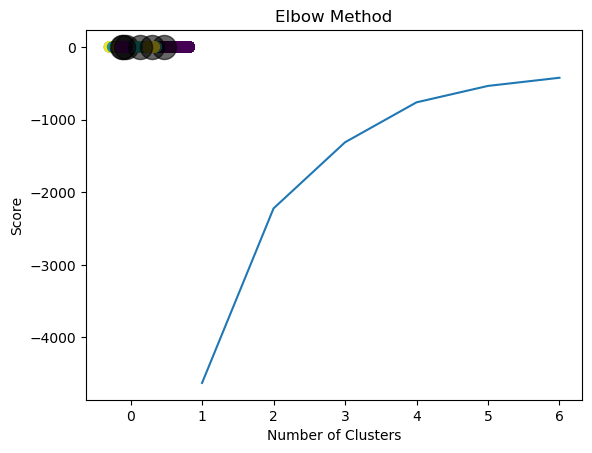

In [430]:
elbow_plot(ind['industries'], 1, 7)

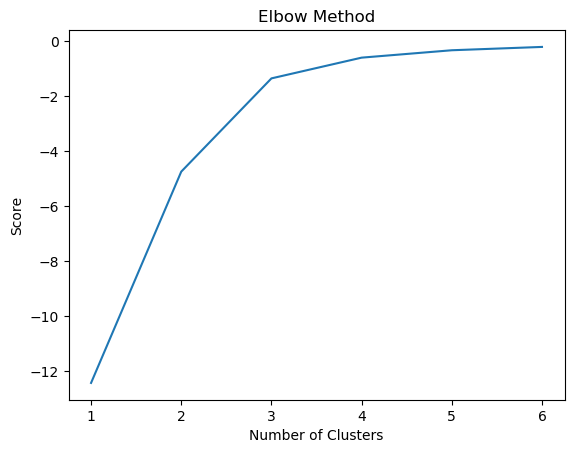

In [431]:
elbow_plot(hubs['related_hubs'], 1, 7)

In [432]:
from sklearn.metrics import pairwise_distances

def test_fit_and_predict(clusters, seed, iterations, data):
    #tfidf_array = create_tfidf_array(data)
    Y_sklearn = dim_reduction(data)
    
#     sklearn_pca = PCA(n_components = 2)
#     Y_sklearn = sklearn_pca.fit_transform(tfidf_array)

    kmeans_test = Kmeans(clusters, seed, iterations)
    fitted = kmeans_test.fit_kmeans(Y_sklearn)
    predicted_values = kmeans_test.predict(Y_sklearn)

    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

    centers = fitted.centroids
    plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)
    
    return predicted_values

#     kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
#     fitted = kmeans.fit(Y_sklearn)
#     prediction = kmeans.predict(Y_sklearn)

In [433]:
predicted_values_industry = test_fit_and_predict(3, 1, 200, ind['industries'])

Running Model Iteration 0 
Running Model Iteration 100 
Model finished running


In [434]:
len(predicted_values_industry)

57152

In [435]:
ind_pred = pd.concat([ind['industries'], pd.Series(predicted_values_industry, index=ind.index)], axis=1)

In [436]:
ind_pred

,industries,0
0,FinTech Hardware Mobile Payments Payments,2
1,Banking Financial Services FinTech Payments,2
2,Enterprise Software Messaging Mobile Apps SMS ...,1
3,Collaboration Information Technology Messaging...,1
4,Artificial Intelligence GPU Hardware Software ...,1
...,...,...
57694,Delivery Electronic Health Record (EHR) Electr...,0
57695,Consumer Goods Food and Beverage Wine And Spirits,2
57696,Consumer Applications Education Human Resource...,2
57697,Analytics Big Data Biometrics Cyber Security F...,1


In [437]:
predicted_values_hubs = test_fit_and_predict(3, 1, 200, hubs['related_hubs'])

Running Model Iteration 0 
Running Model Iteration 100 
Model finished running


In [438]:
len(predicted_values_hubs)

319

In [439]:
hubs_pred = pd.concat([hubs['related_hubs'], pd.Series(predicted_values_hubs, index=hubs.index)], axis=1)

In [440]:
hubs_pred

,related_hubs,0
0,Square Alumni Founded Companies,0
1,Ant Group Portfolio Companies,1
2,Twilio Alumni Founded Companies,0
4,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",1
6,OurCrowd Portfolio Companies,2
...,...,...
52161,HomeAway Alumni Founded Companies,0
53362,ProSiebenSat.1 Media SE Alumni Founded Companies,0
53443,Ariba Alumni Founded Companies,0
54367,LexisNexis Alumni Founded Companies,0


In [441]:
hubs_pred_ohe = pd.get_dummies(hubs_pred[0], prefix='type')
hubs_pred_ohe

,type_0,type_1,type_2
0,1,0,0
1,0,1,0
2,1,0,0
4,0,1,0
6,0,0,1
...,...,...,...
52161,1,0,0
53362,1,0,0
53443,1,0,0
54367,1,0,0


In [442]:
hubs_pred_ohe.columns = ['related_hubs_type_0', 'related_hubs_type_1', 'related_hubs_type_2']

In [443]:
hubs_pred_ohe

,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2
0,1,0,0
1,0,1,0
2,1,0,0
4,0,1,0
6,0,0,1
...,...,...,...
52161,1,0,0
53362,1,0,0
53443,1,0,0
54367,1,0,0


In [444]:
ind_pred_ohe = pd.get_dummies(ind_pred[0], prefix='type')
ind_pred_ohe

,type_0,type_1,type_2
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
57694,1,0,0
57695,0,0,1
57696,0,0,1
57697,0,1,0


In [445]:
ind_pred_ohe.columns = ['industries_type_0', 'industries_type_1', 'industries_type_2']

In [446]:
df_merged = df.merge(ind_pred_ohe, how='outer', left_index=True, right_index=True)

In [447]:
df_merged

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,downloads_last_30_days,price,diversity_spotlight_(us_only),hub_tags_cat,location_country,location_city,in_startup_cluster,industries_type_0,industries_type_1,industries_type_2
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,373621.0,NaN,NaN,Exited Unicorn,United States,San Francisco,0,0.0,0.0,1.0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,NaN,NaN,NaN,Unicorn,China,Hangzhou,0,0.0,0.0,1.0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,NaN,NaN,NaN,Exited Unicorn,United States,San Francisco,0,0.0,1.0,0.0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,29619410.0,NaN,NaN,Exited Unicorn,United States,San Jose,0,0.0,1.0,0.0
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,NaN,NaN,NaN,NaN,United States,Santa Clara,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57694,"Charlottesville, Virginia, United States",Nov-50,NaN,NaN,Delivery Electronic Health Record (EHR) Electr...,Active,Venture - Series Unknown,NaN,For Profit,Private,...,NaN,NaN,Women Founded Women Led,NaN,United States,Charlottesville,0,1.0,0.0,0.0
57695,"Los Angeles, California, United States",1-Oct,NaN,NaN,Consumer Goods Food and Beverage Wine And Spirits,Active,Series A,NaN,For Profit,Private,...,NaN,NaN,Women Founded,NaN,United States,Los Angeles,1,0.0,0.0,1.0
57696,"Toronto, Ontario, Canada",1-Oct,NaN,NaN,Consumer Applications Education Human Resource...,Active,Pre-Seed,NaN,For Profit,Private,...,NaN,NaN,NaN,NaN,Canada,Toronto,0,0.0,0.0,1.0
57697,"London, England, United Kingdom",Nov-50,NaN,NaN,Analytics Big Data Biometrics Cyber Security F...,Active,Venture - Series Unknown,NaN,For Profit,Private,...,NaN,NaN,NaN,NaN,United Kingdom,London,1,0.0,1.0,0.0


In [448]:
df_merged['industries_type_0'].unique()

array([ 0.,  1., nan])

In [449]:
df_merged2 = df_merged.merge(hubs_pred_ohe, how='outer', left_index=True, right_index=True)

In [450]:
df_merged2

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,hub_tags_cat,location_country,location_city,in_startup_cluster,industries_type_0,industries_type_1,industries_type_2,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,Exited Unicorn,United States,San Francisco,0,0.0,0.0,1.0,1.0,0.0,0.0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,Unicorn,China,Hangzhou,0,0.0,0.0,1.0,0.0,1.0,0.0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,Exited Unicorn,United States,San Francisco,0,0.0,1.0,0.0,1.0,0.0,0.0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,Exited Unicorn,United States,San Jose,0,0.0,1.0,0.0,NaN,NaN,NaN
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,NaN,United States,Santa Clara,0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57694,"Charlottesville, Virginia, United States",Nov-50,NaN,NaN,Delivery Electronic Health Record (EHR) Electr...,Active,Venture - Series Unknown,NaN,For Profit,Private,...,NaN,United States,Charlottesville,0,1.0,0.0,0.0,NaN,NaN,NaN
57695,"Los Angeles, California, United States",1-Oct,NaN,NaN,Consumer Goods Food and Beverage Wine And Spirits,Active,Series A,NaN,For Profit,Private,...,NaN,United States,Los Angeles,1,0.0,0.0,1.0,NaN,NaN,NaN
57696,"Toronto, Ontario, Canada",1-Oct,NaN,NaN,Consumer Applications Education Human Resource...,Active,Pre-Seed,NaN,For Profit,Private,...,NaN,Canada,Toronto,0,0.0,0.0,1.0,NaN,NaN,NaN
57697,"London, England, United Kingdom",Nov-50,NaN,NaN,Analytics Big Data Biometrics Cyber Security F...,Active,Venture - Series Unknown,NaN,For Profit,Private,...,NaN,United Kingdom,London,1,0.0,1.0,0.0,NaN,NaN,NaN


In [451]:
df_merged2.select_dtypes(include='object').columns

Index(['location', 'employee', 'hiring_status', 'investor_type', 'industries',
       'operating_status', 'last_funding_type', 'related_hubs', 'company_type',
       'ipo_status', 'hub_tags', 'investment_stage', 'total_funding_amount',
       'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo', 'price',
       'diversity_spotlight_(us_only)', 'hub_tags_cat', 'location_country',
       'location_city'],
      dtype='object')

## STOP HERE FOR SNS PLOTS

In [452]:
def hub_tags_to_ohe(df):
    ohe_types = pd.get_dummies(df['hub_tags_cat'], prefix='type')
    new_df = pd.concat([df.drop('hub_tags_cat', axis=1), ohe_types], axis=1)
    return new_df

In [453]:
df_merged2 = hub_tags_to_ohe(df_merged2)

In [454]:
# def last_fund_type_to_ohe(df):
#     ohe_types = pd.get_dummies(df['last_funding_type'], prefix='type')
#     new_df = pd.concat([df.drop('last_funding_type', axis=1), ohe_types], axis=1)
#     return new_df

In [455]:
# df_merged2 = last_fund_type_to_ohe(df_merged2)

In [456]:
# def ipo_status_to_ohe(df):
#     ohe_types = pd.get_dummies(df['ipo_status'], prefix='type')
#     new_df = pd.concat([df.drop('ipo_status', axis=1), ohe_types], axis=1)
#     return new_df

In [457]:
# df_merged2 = ipo_status_to_ohe(df_merged2)

In [458]:
df_merged2

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,industries_type_0,industries_type_1,industries_type_2,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2,type_Emerging Unicorn,type_Exited Unicorn,type_Others,type_Unicorn
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,0.0,0.0,1.0,1.0,0.0,0.0,0,1,0,0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,0.0,1.0,0.0,NaN,NaN,NaN,0,1,0,0
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57694,"Charlottesville, Virginia, United States",Nov-50,NaN,NaN,Delivery Electronic Health Record (EHR) Electr...,Active,Venture - Series Unknown,NaN,For Profit,Private,...,1.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0
57695,"Los Angeles, California, United States",1-Oct,NaN,NaN,Consumer Goods Food and Beverage Wine And Spirits,Active,Series A,NaN,For Profit,Private,...,0.0,0.0,1.0,NaN,NaN,NaN,0,0,0,0
57696,"Toronto, Ontario, Canada",1-Oct,NaN,NaN,Consumer Applications Education Human Resource...,Active,Pre-Seed,NaN,For Profit,Private,...,0.0,0.0,1.0,NaN,NaN,NaN,0,0,0,0
57697,"London, England, United Kingdom",Nov-50,NaN,NaN,Analytics Big Data Biometrics Cyber Security F...,Active,Venture - Series Unknown,NaN,For Profit,Private,...,0.0,1.0,0.0,NaN,NaN,NaN,0,0,0,0


In [459]:
def company_type_to_ohe(df):
    ohe_types = pd.get_dummies(df['company_type'], prefix='type')
    new_df = pd.concat([df.drop('company_type', axis=1), ohe_types], axis=1)
    return new_df

In [460]:
df_merged2 = company_type_to_ohe(df_merged2)

In [461]:
df["employee"].unique()

array(['1001-5000', '5001-10000', '10001+', '101-250', '501-1000',
       '251-500', 'Nov-50', '51-100', '1-Oct', nan, 'Oct-21'],
      dtype=object)

In [462]:
def employees_to_le(df):
    employees = {'1-Oct':1, '1-10':1, 'Nov-50':2, '11-50': 2, '51-100':3, '101-250':4, '251-500':5, 
                 '501-1000':6, '1001-5000':7, '5001-10000':8, '10001+':9}
    
    df['employee'] = df['employee'].apply(lambda x: x if x in employees.keys() else np.nan)
    df["employee_cat"] = df["employee"]
    df.replace({'employee_cat': employees}, inplace=True) 

In [463]:
employees_to_le(df_merged2)

In [464]:
len(df_merged2)

57699

In [465]:
# df_merged2 = df_merged2[df_merged2['operating_status'].notna()]
# df_merged2.reset_index(inplace=True)

In [466]:
df_merged2 = df_merged2[df_merged2['ipo_status'].notna()]
df_merged2.reset_index(inplace=True)
df_merged2.drop(['index'], axis=1, inplace=True)

In [467]:
len(df_merged2)

57699

In [468]:
# def opstatus_to_le(df): # target variable
#     df["operating_status_cat"] = df["operating_status"].astype('category').cat.codes

In [469]:
def grp_ipostatus(ipo):
    tags = {'Success':['Public'],
            'Failure': ['Delisted', 'Private']}
    
    if ipo is not np.nan:
        for k, v in tags.items():
            if ipo in v:
                return k
        return k
    else:
        return np.nan

df_merged2['ipo_status'] = df_merged2['ipo_status'].apply(lambda x: grp_ipostatus(x))

In [470]:
df_merged2['ipo_status'].value_counts()

Failure    53688
Success     4011
Name: ipo_status, dtype: int64

In [497]:
def opstatus_to_le(df): 
    df["operating_status"] = df["operating_status"].astype('category').cat.codes

In [498]:
opstatus_to_le(df_merged2)

In [499]:
df_merged2['operating_status'].value_counts()

0    56730
1      969
Name: operating_status, dtype: int64

In [471]:
def ipostatus_to_le(df): # target variable
    df["ipo_status"] = df["ipo_status"].astype('category').cat.codes

In [472]:
ipostatus_to_le(df_merged2)

In [473]:
df_merged2.head()

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,ipo_status,hub_tags,...,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2,type_Emerging Unicorn,type_Exited Unicorn,type_Others,type_Unicorn,type_For Profit,type_Non Profit,employee_cat
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,1,Exited Unicorn,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,0,Unicorn,...,0.0,1.0,0.0,0,0,0,1,1,0,8.0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,1,"Exited Unicorn, Pledge 1%",...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,1,Exited Unicorn,...,NaN,NaN,NaN,0,1,0,0,1,0,7.0
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",1,NaN,...,0.0,1.0,0.0,0,0,0,0,1,0,9.0


In [474]:
df_merged2.drop(['location', 'employee', 'industries','related_hubs', 
                 'hub_tags', 'investment_stage', 'location_country', 'location_city', 
                 'diversity_spotlight_(us_only)', 'hiring_status', 'investor_type'], axis=1, inplace=True)

In [475]:
df_merged2

,operating_status,last_funding_type,ipo_status,number_of_funding_rounds,number_of_lead_investors,number_of_investors,number_of_funds,total_funding_amount,total_fund_raised,number_of_investments,...,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2,type_Emerging Unicorn,type_Exited Unicorn,type_Others,type_Unicorn,type_For Profit,type_Non Profit,employee_cat
0,Active,Post-IPO Equity,1,11.0,4.0,44.0,NaN,601200000.0,NaN,16.0,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
1,Active,Series C,0,4.0,4.0,15.0,NaN,22000000000.0,NaN,103.0,...,0.0,1.0,0.0,0,0,0,1,1,0,8.0
2,Active,Post-IPO Equity,1,10.0,7.0,24.0,1.0,236200000.0,50000000.0,13.0,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
3,Active,Post-IPO Equity,1,7.0,4.0,18.0,1.0,146000000.0,100000000.0,3.0,...,NaN,NaN,NaN,0,1,0,0,1,0,7.0
4,Active,Post-IPO Equity,1,4.0,3.0,4.0,NaN,4000000000.0,NaN,17.0,...,0.0,1.0,0.0,0,0,0,0,1,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57694,Active,Venture - Series Unknown,0,3.0,NaN,1.0,NaN,1600000.0,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,1,0,2.0
57695,Active,Series A,0,3.0,NaN,NaN,NaN,2000000.0,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,1,0,1.0
57696,Active,Pre-Seed,0,1.0,NaN,NaN,NaN,996000.0,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,1,0,1.0
57697,Active,Venture - Series Unknown,0,3.0,NaN,1.0,NaN,3294000.0,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,1,0,2.0


In [476]:
nan_eda(df_merged2)[nan_eda(df_merged2)['Percent of NaNs']==0]

,Total NaNs,Percent of NaNs
last_funding_type,0,0.0
in_startup_cluster,0,0.0
ipo_status,0,0.0
type_Emerging Unicorn,0,0.0
type_Exited Unicorn,0,0.0
type_Others,0,0.0
type_Unicorn,0,0.0
type_For Profit,0,0.0
type_Non Profit,0,0.0
operating_status,0,0.0


In [123]:
# def handle_numeric_nan(df):
#     cols = ['number_of_funding_rounds', 'number_of_lead_investors', 'number_of_investors', 
#             'number_of_funds', 'total_funding_amount', 'total_fund_raised', 'number_of_investments',
#             'number_of_lead_investments', 'number_of_diversity_investments', 'number_of_acquisitions',
#             'number_of_exits', 'number_of_board_member_and_advisor_profiles','number_of_employee_profiles',
#             'total_products_active', 'monthly_visits', 'monthly_visits_growth', 'active_tech_count', 
#             'number_of_articles', 'number_of_events', 'valuation_at_ipo', 'money_raised_at_ipo',
#             'last_funding', 'ipo_share_price', 'downloads_last_30_days', 'price', 'in_startup_cluster',
#            'employee_cat', 'operating_status_cat']
#     for i in cols:
#         df[i].replace(np.nan, df[i].median(), inplace=True)

In [477]:
df_merged2['number_of_funding_rounds'].replace(np.nan, df_merged2['number_of_funding_rounds'].median(), inplace=True)
df_merged2['number_of_lead_investors'].replace(np.nan, df_merged2['number_of_lead_investors'].median(), inplace=True)
df_merged2['number_of_investors'].replace(np.nan, df_merged2['number_of_investors'].median(), inplace=True)
df_merged2['number_of_funds'].replace(np.nan, df_merged2['number_of_funds'].median(), inplace=True)
df_merged2['total_funding_amount'].replace(np.nan, df_merged2['total_funding_amount'].median(), inplace=True)
df_merged2['total_fund_raised'].replace(np.nan, df_merged2['total_fund_raised'].median(), inplace=True)
df_merged2['number_of_investments'].replace(np.nan, df_merged2['number_of_investments'].median(), inplace=True)
df_merged2['number_of_lead_investments'].replace(np.nan, df_merged2['number_of_lead_investments'].median(), inplace=True)
df_merged2['number_of_diversity_investments'].replace(np.nan, df_merged2['number_of_diversity_investments'].median(), inplace=True)
df_merged2['number_of_acquisitions'].replace(np.nan, df_merged2['number_of_acquisitions'].median(), inplace=True)

df_merged2['number_of_board_member_and_advisor_profiles'].replace(np.nan, df_merged2['number_of_board_member_and_advisor_profiles'].median(), inplace=True)
df_merged2['number_of_employee_profiles'].replace(np.nan, df_merged2['number_of_employee_profiles'].median(), inplace=True)
df_merged2['total_products_active'].replace(np.nan, df_merged2['total_products_active'].median(), inplace=True)
df_merged2['monthly_visits'].replace(np.nan, df_merged2['monthly_visits'].median(), inplace=True)
df_merged2['monthly_visits_growth'].replace(np.nan, df_merged2['monthly_visits_growth'].median(), inplace=True)
df_merged2['active_tech_count'].replace(np.nan, df_merged2['active_tech_count'].median(), inplace=True)
df_merged2['number_of_articles'].replace(np.nan, df_merged2['number_of_articles'].median(), inplace=True)
df_merged2['number_of_events'].replace(np.nan, df_merged2['number_of_events'].median(), inplace=True)
df_merged2['valuation_at_ipo'].replace(np.nan, df_merged2['valuation_at_ipo'].median(), inplace=True)
df_merged2['money_raised_at_ipo'].replace(np.nan, df_merged2['money_raised_at_ipo'].median(), inplace=True)

In [478]:
df_merged2['downloads_last_30_days'].replace(np.nan, df_merged2['downloads_last_30_days'].median(), inplace=True)
df_merged2['price'].replace(np.nan, df_merged2['price'].median(), inplace=True)
df_merged2['in_startup_cluster'].replace(np.nan, df_merged2['in_startup_cluster'].median(), inplace=True)
df_merged2['employee_cat'].replace(np.nan, df_merged2['employee_cat'].median(), inplace=True)

In [479]:
nan_eda(df_merged2)[nan_eda(df_merged2)['Percent of NaNs']==0]

,Total NaNs,Percent of NaNs
money_raised_at_ipo,0,0.0
downloads_last_30_days,0,0.0
price,0,0.0
in_startup_cluster,0,0.0
operating_status,0,0.0
number_of_events,0,0.0
type_Emerging Unicorn,0,0.0
type_Exited Unicorn,0,0.0
type_Others,0,0.0
type_Unicorn,0,0.0


In [480]:
nan_eda(df_merged2)

,Total NaNs,Percent of NaNs
related_hubs_type_1,57380,0.994471
related_hubs_type_0,57380,0.994471
related_hubs_type_2,57380,0.994471
industries_type_0,547,0.009480
industries_type_1,547,0.009480
industries_type_2,547,0.009480
money_raised_at_ipo,0,0.000000
downloads_last_30_days,0,0.000000
price,0,0.000000
in_startup_cluster,0,0.000000


In [481]:
print(df_merged2['industries_type_0'].sum())
print(df_merged2['industries_type_1'].sum())
print(df_merged2['industries_type_2'].sum())

9062.0
17286.0
30804.0


In [482]:
def replace_nan_industries(df):
    for i in range(len(df)):
        if math.isnan(df['industries_type_0'][i]):
            df['industries_type_0'][i] = 0
        if math.isnan(df['industries_type_1'][i]):
            df['industries_type_1'][i] = 0
        if math.isnan(df['industries_type_2'][i]):
            df['industries_type_2'][i] = 1

In [483]:
replace_nan_industries(df_merged2)

In [484]:
print(df_merged2['related_hubs_type_0'].sum())
print(df_merged2['related_hubs_type_1'].sum())
print(df_merged2['related_hubs_type_2'].sum())

220.0
41.0
58.0


In [485]:
def replace_nan_related_hubs(df):
    for i in range(len(df)):
        if math.isnan(df['related_hubs_type_0'][i]):
            df['related_hubs_type_0'][i] = 1
        if math.isnan(df['related_hubs_type_1'][i]):
            df['related_hubs_type_1'][i] = 0
        if math.isnan(df['related_hubs_type_2'][i]):
            df['related_hubs_type_2'][i] = 0

In [486]:
replace_nan_related_hubs(df_merged2)

In [487]:
nan_eda(df_merged2)

,Total NaNs,Percent of NaNs
operating_status,0,0.0
related_hubs_type_0,0,0.0
money_raised_at_ipo,0,0.0
downloads_last_30_days,0,0.0
price,0,0.0
in_startup_cluster,0,0.0
industries_type_0,0,0.0
industries_type_1,0,0.0
industries_type_2,0,0.0
related_hubs_type_1,0,0.0


In [488]:
def grp_last_funding_type(last_fund):
    tags = {'Group A':['Pre-Seed', 'Debt Financing', 'Private Equity', 'Angel', 'Seed', 'Initial Coin Offering', 'Venture - Series Unknown', 'Equity Crowdfunding'], 
            'Group B': ['Secondary Market', 'Post-IPO Secondary', 'Post-IPO Equity', 'Series G', 'Series H', 'Series I', 'Series F', 'Post-IPO Debt'], 
            'Group C': ['Product Crowdfunding', 'Corporate Round', 'Convertible Note', 'Undisclosed', 'Series A', 'Series B', 'Series C', 'Grant', 'Series D', 'Series E', 'Non-equity Assistance']}
    
    if last_fund is not np.nan:
        for k, v in tags.items():
            if last_fund in v:
                return k
        return k
    else:
        return np.nan

df_merged2['last_funding_type'] = df_merged2['last_funding_type'].apply(lambda x: grp_last_funding_type(x))

In [489]:
df_merged2['last_funding_type'].unique()

array(['Group B', 'Group C', 'Group A'], dtype=object)

In [490]:
df_merged2.columns

Index(['operating_status', 'last_funding_type', 'ipo_status',
       'number_of_funding_rounds', 'number_of_lead_investors',
       'number_of_investors', 'number_of_funds', 'total_funding_amount',
       'total_fund_raised', 'number_of_investments',
       'number_of_lead_investments', 'number_of_diversity_investments',
       'number_of_acquisitions', 'number_of_board_member_and_advisor_profiles',
       'number_of_employee_profiles', 'total_products_active',
       'monthly_visits', 'monthly_visits_growth', 'active_tech_count',
       'number_of_articles', 'number_of_events', 'valuation_at_ipo',
       'money_raised_at_ipo', 'downloads_last_30_days', 'price',
       'in_startup_cluster', 'industries_type_0', 'industries_type_1',
       'industries_type_2', 'related_hubs_type_0', 'related_hubs_type_1',
       'related_hubs_type_2', 'type_Emerging Unicorn', 'type_Exited Unicorn',
       'type_Others', 'type_Unicorn', 'type_For Profit', 'type_Non Profit',
       'employee_cat'],
      

In [186]:
# df_merged2.to_csv('combined_0-30k_cleaned_27062021.csv', index=False)

In [374]:
# df_merged2.to_csv('combined_0-30k_cleaned_ipo_stat_01072021.csv', index=False)

In [500]:
df_merged2.to_csv('combined_0-60k_cleaned_ipo_stat_04072021.csv', index=False)

In [501]:
df_merged2[df_merged2['last_funding_type']=="Group A"]['ipo_status'].value_counts()

0    31847
1      456
Name: ipo_status, dtype: int64

In [502]:
df_merged2[df_merged2['last_funding_type']=="Group B"]['ipo_status'].value_counts()

1    2995
0     778
Name: ipo_status, dtype: int64

In [503]:
df_merged2[df_merged2['last_funding_type']=="Group C"]['ipo_status'].value_counts()

0    21063
1      560
Name: ipo_status, dtype: int64

# Model (op status)

In [504]:
df_merged2 = pd.read_csv('combined_0-60k_cleaned_ipo_stat_04072021.csv')

In [505]:
df_merged2

,operating_status,last_funding_type,ipo_status,number_of_funding_rounds,number_of_lead_investors,number_of_investors,number_of_funds,total_funding_amount,total_fund_raised,number_of_investments,...,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2,type_Emerging Unicorn,type_Exited Unicorn,type_Others,type_Unicorn,type_For Profit,type_Non Profit,employee_cat
0,0,Group B,1,11.0,4.0,44.0,1.0,6.012000e+08,50000000.0,16.0,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
1,0,Group C,0,4.0,4.0,15.0,1.0,2.200000e+10,50000000.0,103.0,...,0.0,1.0,0.0,0,0,0,1,1,0,8.0
2,0,Group B,1,10.0,7.0,24.0,1.0,2.362000e+08,50000000.0,13.0,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
3,0,Group B,1,7.0,4.0,18.0,1.0,1.460000e+08,100000000.0,3.0,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
4,0,Group B,1,4.0,3.0,4.0,1.0,4.000000e+09,50000000.0,17.0,...,0.0,1.0,0.0,0,0,0,0,1,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57694,0,Group A,0,3.0,2.0,1.0,1.0,1.600000e+06,50000000.0,2.0,...,1.0,0.0,0.0,0,0,0,0,1,0,2.0
57695,0,Group C,0,3.0,2.0,4.0,1.0,2.000000e+06,50000000.0,2.0,...,1.0,0.0,0.0,0,0,0,0,1,0,1.0
57696,0,Group A,0,1.0,2.0,4.0,1.0,9.960000e+05,50000000.0,2.0,...,1.0,0.0,0.0,0,0,0,0,1,0,1.0
57697,0,Group A,0,3.0,2.0,1.0,1.0,3.294000e+06,50000000.0,2.0,...,1.0,0.0,0.0,0,0,0,0,1,0,2.0


In [507]:
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# model imports
#from sklearn.linear_model import NaiveBayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [508]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
X = df_merged2[df_merged2.columns.drop('operating_status_cat')]
y = df_merged2[['operating_status_cat']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Scaling data

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred_knn = knn.predict(X_test)

In [12]:
confusion_matrix(y_test, y_pred_knn)

array([[5704,    1],
       [  59,    0]])

In [20]:
scaler = StandardScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
smote = SMOTE(random_state=42, sampling_strategy=0.5) 

# fit predictor and target variable
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [22]:
y_train_smote.value_counts()

operating_status_cat
0                       22816
1                       11408
dtype: int64

## Fitting models

## kNN

In [298]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_smote, y_train_smote)

KNeighborsClassifier()

In [299]:
y_pred_knn = knn.predict(X_test_scaled)

In [300]:
accuracy_score(y_test, y_pred_knn)

0.9227966689798751

In [301]:
f1_score(y_test, y_pred_knn)

0.0631578947368421

In [303]:
# 0 active
len(y_pred_knn)

5764

In [304]:
y_pred_knn.sum()

416

In [305]:
confusion_matrix(y_test, y_pred_knn)

array([[5304,  401],
       [  44,   15]])

# Decision trees

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled_smote, y_train_smote)

DecisionTreeClassifier()

In [28]:
y_pred_dt = dt.predict(X_test_scaled)

In [29]:
accuracy_score(y_test, y_pred_dt)

0.9705065926439972

In [30]:
f1_score(y_test, y_pred_dt)

0.08602150537634409

In [32]:
confusion_matrix(y_test, y_pred_dt)

array([[5586,  119],
       [  51,    8]])

# Random forest

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_smote, y_train_smote)

RandomForestClassifier()

In [35]:
y_pred_rf = rf.predict(X_test_scaled)

In [36]:
y_pred_rf.sum()

18

In [37]:
accuracy_score(y_test, y_pred_rf)

0.988029146426093

In [38]:
f1_score(y_test, y_pred_rf)

0.1038961038961039

In [39]:
confusion_matrix(y_test, y_pred_rf)

array([[5691,   14],
       [  55,    4]])

In [40]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

In [41]:
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
number_of_investors,0.093394
number_of_employee_profiles,0.083242
number_of_funding_rounds,0.082351
number_of_articles,0.080006
active_tech_count,0.071495
...,...
type_Series H,0.000004
type_Series I,0.000004
number_of_funds,0.000004
type_Series J,0.000000


In [42]:
importances.sort_values(by='Gini-importance', ascending=False)[0:15]

,Gini-importance
number_of_investors,0.093394
number_of_employee_profiles,0.083242
number_of_funding_rounds,0.082351
number_of_articles,0.080006
active_tech_count,0.071495
number_of_lead_investors,0.065027
monthly_visits,0.058107
monthly_visits_growth,0.055643
number_of_board_member_and_advisor_profiles,0.053516
total_funding_amount,0.049365


In [43]:
importances.sort_values(by='Gini-importance', ascending=False)[0:15].index

Index(['number_of_investors', 'number_of_employee_profiles',
       'number_of_funding_rounds', 'number_of_articles', 'active_tech_count',
       'number_of_lead_investors', 'monthly_visits', 'monthly_visits_growth',
       'number_of_board_member_and_advisor_profiles', 'total_funding_amount',
       'total_products_active', 'number_of_events', 'employee_cat',
       'in_startup_cluster', 'number_of_acquisitions'],
      dtype='object')

## SVM

In [15]:
svm = LinearSVC()
svm.fit(X_train_scaled_smote, y_train_smote)

LinearSVC()

In [16]:
y_pred_svm = svm.predict(X_test_scaled)

In [17]:
accuracy_score(y_test, y_pred_svm)

0.892088827203331

In [18]:
f1_score(y_test, y_pred_svm)

0.06042296072507553

In [19]:
confusion_matrix(y_test, y_pred_svm)

array([[5122,  583],
       [  39,   20]])

In [320]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, svm.coef_[0]):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'SVM coeff'})

In [321]:
importances.sort_values(by='SVM coeff', ascending=False)

,SVM coeff
type_Series A,1.025746
type_Venture - Series Unknown,1.008519
type_Seed,0.916364
type_Series B,0.875997
type_Series C,0.655928
...,...
number_of_employee_profiles,-1.043361
number_of_diversity_investments,-1.110656
valuation_at_ipo,-1.473306
monthly_visits,-1.619587


In [322]:
importances.sort_values(by='SVM coeff', ascending=False)[0:15]

,SVM coeff
type_Series A,1.025746
type_Venture - Series Unknown,1.008519
type_Seed,0.916364
type_Series B,0.875997
type_Series C,0.655928
type_Post-IPO Equity,0.549915
type_Debt Financing,0.511810
type_Private Equity,0.488530
type_Series D,0.443573
type_Corporate Round,0.378454


# xgboost

In [335]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled_smote, y_train_smote)

y_pred_xgb = xgb.predict(X_test_scaled)

In [336]:
accuracy_score(y_test, y_pred_xgb)

0.9888965995836225

In [337]:
f1_score(y_test, y_pred_xgb)

0.0588235294117647

In [338]:
confusion_matrix(y_test, y_pred_xgb)

array([[5698,    7],
       [  57,    2]])

In [339]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, xgb.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'XGB importance'})

In [340]:
importances.sort_values(by='XGB importance', ascending=False)

,XGB importance
number_of_employee_profiles,0.070847
industries_type_0,0.063132
type_Private,0.048274
in_startup_cluster,0.046089
number_of_lead_investors,0.045253
...,...
related_hubs_type_0,0.000000
related_hubs_type_1,0.000000
type_Secondary Market,0.000000
type_Product Crowdfunding,0.000000


In [341]:
importances.sort_values(by='XGB importance', ascending=False)[0:15]

,XGB importance
number_of_employee_profiles,0.070847
industries_type_0,0.063132
type_Private,0.048274
in_startup_cluster,0.046089
number_of_lead_investors,0.045253
number_of_articles,0.043060
monthly_visits,0.040784
number_of_board_member_and_advisor_profiles,0.040403
number_of_events,0.038555
number_of_investors,0.037367


# kfold + diff sampling strategies

In [509]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from sklearn.model_selection import StratifiedKFold

In [45]:
# top 15 features from best model above (RF)
features = ['number_of_investors', 'number_of_employee_profiles',
       'number_of_funding_rounds', 'number_of_articles', 'active_tech_count',
       'number_of_lead_investors', 'monthly_visits', 'monthly_visits_growth',
       'number_of_board_member_and_advisor_profiles', 'total_funding_amount',
       'total_products_active', 'number_of_events', 'employee_cat',
       'in_startup_cluster', 'number_of_acquisitions']

In [49]:
x_var = features
y_var = 'operating_status_cat'
 
train = df_merged2
all_y_preds = []
all_y_proba = []
all_y_true = []



kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=False) 
kf.get_n_splits(train[x_var], train[y_var])
#5 sets of predictions -> 5 conf matrices -> need to add to get 1 conf matrix

for train_index, test_index in kf.split(train[x_var], train[y_var]):
    
    curr_train, curr_test = train.iloc[train_index], train.iloc[test_index]
    X_train = curr_train[x_var]
    y_train = curr_train[y_var]
    
    X_test = curr_test[x_var]
    y_test = curr_test[y_var]
    
    smote_only = SMOTE(random_state=42, sampling_strategy=0.5) #target ratio to oversample you want is 0.5 
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    
    rf = RandomForestClassifier(random_state =1)
    rf_model_smote = rf.fit(X_res_smote, y_res_smote)
    y_preds = rf_model_smote.predict(X_test)
    y_proba = rf_model_smote.predict_proba(X_test)
    all_y_preds.extend(y_preds)
    all_y_proba.extend(y_proba[:, 1])
    all_y_true.extend(y_test)

    
print("accuracy:", accuracy_score(all_y_true, all_y_preds))

print("F1:", f1_score(all_y_true, all_y_preds))

confusion_matrix(all_y_true, all_y_preds) #output combined conf matrix

accuracy: 0.9881332408049965
F1: 0.09523809523809523


array([[28460,    61],
       [  281,    18]])

## Method (2) - SMOTEEN

In [51]:
x_var = features
y_var = 'operating_status_cat'
 
train = df_merged2
all_y_preds = []
all_y_proba = []
all_y_true = []



kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=False)
kf.get_n_splits(train[x_var], train[y_var])
#5 sets of predictions -> 5 conf matrices -> need to add to get 1 conf matrix

for train_index, test_index in kf.split(train[x_var], train[y_var]):
    
    curr_train, curr_test = train.iloc[train_index], train.iloc[test_index]
    X_train = curr_train[x_var]
    y_train = curr_train[y_var]
    
    X_test = curr_test[x_var]
    y_test = curr_test[y_var]
    
    smote_only = SMOTE(random_state=42, sampling_strategy=0.5) #target ratio to oversample you want is 0.5 
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    
    rf = RandomForestClassifier(random_state =1)
    rf_model_smoteENN = rf.fit(X_res_smoteENN, y_res_smoteENN)
    y_preds = rf_model_smoteENN.predict(X_test)
    y_proba = rf_model_smoteENN.predict_proba(X_test)
    all_y_preds.extend(y_preds)
    all_y_proba.extend(y_proba[:, 1])
    all_y_true.extend(y_test)


    
print("accuracy:", accuracy_score(all_y_true, all_y_preds))

print("F1:", f1_score(all_y_true, all_y_preds))

confusion_matrix(all_y_true, all_y_preds) #output combined conf matrix

accuracy: 0.9848022206800833
F1: 0.124


array([[28351,   170],
       [  268,    31]])

## Method (3) - Overweighting

In [52]:
x_var = features
y_var = 'operating_status_cat'
 
train = df_merged2
auc_scores = []
all_y_preds = []
all_y_proba = []
all_y_true = []

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=False) 
kf.get_n_splits(train[x_var], train[y_var])
#5 sets of predictions -> 5 conf matrices -> need to add to get 1 conf matrix

for train_index, test_index in kf.split(train[x_var], train[y_var]):
    curr_train, curr_test = train.iloc[train_index], train.iloc[test_index]
    X_train = curr_train[x_var]
    y_train = curr_train[y_var]
    
    X_test = curr_test[x_var]
    y_test = curr_test[y_var]
    
    rf = RandomForestClassifier(random_state =1, class_weight={0: 1, 1: 40})
    rf.fit(X_train, y_train)
    y_preds = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)
    all_y_preds.extend(y_preds)
    all_y_proba.extend(y_proba[:, 1])
    all_y_true.extend(y_test)

    
print("accuracy:", accuracy_score(all_y_true, all_y_preds))

print("F1:", f1_score(all_y_true, all_y_preds))


confusion_matrix(all_y_true, all_y_preds) #output combined conf matrix

accuracy: 0.9891394864677308
F1: 0.024922118380062305


array([[28503,    18],
       [  295,     4]])

# Models (ipo status)

In [510]:
df_merged2 = pd.read_csv('combined_0-60k_cleaned_ipo_stat_04072021.csv')

In [511]:
df_merged2

,operating_status,last_funding_type,ipo_status,number_of_funding_rounds,number_of_lead_investors,number_of_investors,number_of_funds,total_funding_amount,total_fund_raised,number_of_investments,...,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2,type_Emerging Unicorn,type_Exited Unicorn,type_Others,type_Unicorn,type_For Profit,type_Non Profit,employee_cat
0,0,Group B,1,11.0,4.0,44.0,1.0,6.012000e+08,50000000.0,16.0,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
1,0,Group C,0,4.0,4.0,15.0,1.0,2.200000e+10,50000000.0,103.0,...,0.0,1.0,0.0,0,0,0,1,1,0,8.0
2,0,Group B,1,10.0,7.0,24.0,1.0,2.362000e+08,50000000.0,13.0,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
3,0,Group B,1,7.0,4.0,18.0,1.0,1.460000e+08,100000000.0,3.0,...,1.0,0.0,0.0,0,1,0,0,1,0,7.0
4,0,Group B,1,4.0,3.0,4.0,1.0,4.000000e+09,50000000.0,17.0,...,0.0,1.0,0.0,0,0,0,0,1,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57694,0,Group A,0,3.0,2.0,1.0,1.0,1.600000e+06,50000000.0,2.0,...,1.0,0.0,0.0,0,0,0,0,1,0,2.0
57695,0,Group C,0,3.0,2.0,4.0,1.0,2.000000e+06,50000000.0,2.0,...,1.0,0.0,0.0,0,0,0,0,1,0,1.0
57696,0,Group A,0,1.0,2.0,4.0,1.0,9.960000e+05,50000000.0,2.0,...,1.0,0.0,0.0,0,0,0,0,1,0,1.0
57697,0,Group A,0,3.0,2.0,1.0,1.0,3.294000e+06,50000000.0,2.0,...,1.0,0.0,0.0,0,0,0,0,1,0,2.0


In [512]:
A = df_merged2[df_merged2['last_funding_type']=="Group A"]
B = df_merged2[df_merged2['last_funding_type']=="Group B"]
C = df_merged2[df_merged2['last_funding_type']=="Group C"]

## A

In [541]:
X = A[['number_of_investors', 'number_of_employee_profiles', 'number_of_funding_rounds', 'number_of_articles',
'active_tech_count', 'number_of_lead_investors', 'monthly_visits', 'monthly_visits_growth', 
 'number_of_board_member_and_advisor_profiles', 'total_funding_amount', 'total_products_active', 
 'number_of_events', 'employee_cat', 'in_startup_cluster', 'number_of_acquisitions']]
y = A[['ipo_status']]

In [542]:
y.value_counts()

ipo_status
0             31847
1               456
dtype: int64

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [544]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42, sampling_strategy=0.5) 
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

y_train_smote.value_counts()

ipo_status
0             25497
1             12748
dtype: int64

In [545]:
y_test.value_counts()

ipo_status
0             6350
1              111
dtype: int64

In [517]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_smote, y_train_smote)

RandomForestClassifier()

In [546]:
y_train_pred_rf = rf.predict(X_train_scaled_smote) # train
y_pred_rf = rf.predict(X_test_scaled) # test

In [547]:
# train
print('accuracy: ', accuracy_score(y_train_smote, y_train_pred_rf))
print('f1: ', f1_score(y_test, y_pred_rf))

accuracy:  0.6356124983657995
f1:  0.03994789405123751


In [519]:
# test
print('accuracy: ', accuracy_score(y_test, y_pred_rf))
print('f1: ', f1_score(y_test, y_pred_rf))

#accuracy:  0.9880860876249039
#f1:  0.16216216216216214

# accuracy:  0.995772482705611
# f1:  0.9978801310464442

accuracy:  0.9808079244698963
f1:  0.21518987341772153


In [520]:
confusion_matrix(y_test, y_pred_rf)

#array([[2568,   14],
#       [  17,    3]])

# array([[   2,    9],
#        [   2, 2589]])

array([[6320,   30],
       [  94,   17]])

In [521]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
number_of_acquisitions,0.151235
last_funding_type,0.108333
number_of_employee_profiles,0.107207
number_of_funding_rounds,0.105804
number_of_funds,0.105387
number_of_lead_investments,0.064584
number_of_investments,0.061888
total_fund_raised,0.053745
number_of_lead_investors,0.045094
ipo_status,0.042330


## B

In [522]:
X = B[['number_of_investors', 'number_of_employee_profiles', 'number_of_funding_rounds', 'number_of_articles',
'active_tech_count', 'number_of_lead_investors', 'monthly_visits', 'monthly_visits_growth', 
 'number_of_board_member_and_advisor_profiles', 'total_funding_amount', 'total_products_active', 
 'number_of_events', 'employee_cat', 'in_startup_cluster', 'number_of_acquisitions']]
y = B[['ipo_status']]

In [523]:
y.value_counts()

ipo_status
1             2995
0              778
dtype: int64

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [525]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42, sampling_strategy=0.5) 
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

y_train_smote.value_counts()

ipo_status
1             2422
0             1211
dtype: int64

In [526]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_smote, y_train_smote)

RandomForestClassifier()

In [527]:
y_pred_rf = rf.predict(X_test_scaled)

In [528]:
print('accuracy: ', accuracy_score(y_test, y_pred_rf))
print('f1: ', f1_score(y_test, y_pred_rf))


# accuracy:  0.9959183673469387
# f1:  0.0

# accuracy:  0.9326530612244898
# f1:  0.9649309245483528

accuracy:  0.7986754966887417
f1:  0.878594249201278


In [529]:
confusion_matrix(y_test, y_pred_rf)

# array([[488,   0],
#        [  2,   0]])

# array([[  3,  32],
#        [  1, 454]])

array([[ 53, 129],
       [ 23, 550]])

In [530]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
operating_status,0.107469
number_of_investments,0.097035
number_of_funds,0.078130
number_of_acquisitions,0.077745
number_of_lead_investments,0.075623
ipo_status,0.074977
number_of_lead_investors,0.073847
number_of_investors,0.073334
number_of_funding_rounds,0.071575
total_funding_amount,0.068014


## C

In [531]:
X = C[['number_of_investors', 'number_of_employee_profiles', 'number_of_funding_rounds', 'number_of_articles',
'active_tech_count', 'number_of_lead_investors', 'monthly_visits', 'monthly_visits_growth', 
 'number_of_board_member_and_advisor_profiles', 'total_funding_amount', 'total_products_active', 
 'number_of_events', 'employee_cat', 'in_startup_cluster', 'number_of_acquisitions']]
y = C[['ipo_status']]

In [532]:
y.value_counts()

ipo_status
0             21063
1               560
dtype: int64

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [534]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42, sampling_strategy=0.5) 
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

y_train_smote.value_counts()

ipo_status
0             16848
1              8424
dtype: int64

In [535]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_smote, y_train_smote)

RandomForestClassifier()

In [536]:
y_pred_rf = rf.predict(X_test_scaled)

In [537]:
print('accuracy: ', accuracy_score(y_test, y_pred_rf))
print('f1: ', f1_score(y_test, y_pred_rf))

# accuracy:  0.9850917431192661
# f1:  0.0

# accuracy:  0.996177370030581
# f1:  0.9980842911877394

accuracy:  0.9729479768786127
f1:  0.2909090909090909


In [538]:
confusion_matrix(y_test, y_pred_rf)

# array([[2577,   12],
#        [  27,    0]])

# array([[   1,    5],
#        [   5, 2605]])

array([[4184,   31],
       [  86,   24]])

In [539]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
number_of_investments,0.135470
number_of_acquisitions,0.115887
number_of_funding_rounds,0.099190
number_of_employee_profiles,0.098468
last_funding_type,0.075889
number_of_funds,0.060226
number_of_lead_investments,0.059169
total_funding_amount,0.054439
operating_status,0.054408
number_of_lead_investors,0.051835
